In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [2]:
kappa = 1.0
gamma = (7.5 / 160.0) * kappa
eta = 0.1 * kappa  
g = 4 * kappa
Omega_val = 0.01 * g 
gamma_31 =0.8* gamma 
gamma_32 = 0.2*gamma 
STK = [0 * g, 1 * g]
coarse_range = 3.0 * g 
delta_c_fine = np.linspace(-0.1, 0.1, 601) * g 
delta_c_coarse = np.linspace(-coarse_range, coarse_range, 601) 
delta_c_list = np.unique(np.sort(np.concatenate((delta_c_coarse, delta_c_fine))))

N_c = 6 
N_a = 3 

a = tensor(destroy(N_c), qeye(N_a))

s00 = tensor(qeye(N_c), basis(N_a, 0) * basis(N_a, 0).dag()) 
s11 = tensor(qeye(N_c), basis(N_a, 1) * basis(N_a, 1).dag()) 
s22 = tensor(qeye(N_c), basis(N_a, 2) * basis(N_a, 2).dag()) 
s02 = tensor(qeye(N_c), basis(N_a, 0) * basis(N_a, 2).dag()) 
s20 = s02.dag()
s12 = tensor(qeye(N_c), basis(N_a, 1) * basis(N_a, 2).dag()) 
s21 = s12.dag()
c_ops = []
c_ops.append(np.sqrt(kappa) * a) 
c_ops.append(np.sqrt(gamma_31) * s02)
c_ops.append(np.sqrt(gamma_32) * s12) 
all_g2_0 = []
all_Ta = []
n0 =4* (eta / kappa)**2 
for U0 in STK:
    g2_0_list = []
    Ta_list = []
      
    for Delta_c in delta_c_list:    
        #  formula (1)
        H = (g * (a.dag() * s02 + a * s20) +         
             Omega_val * (s12 + s21) +
             U0 * a.dag() * a * s00 +
             Delta_c * a.dag() * a +                 
             Delta_c * s22 +                          
             Delta_c * s11 +                          
             eta * (a.dag() + a))                    
        rho_ss = steadystate(H, c_ops)    
        n_s = expect(a.dag() * a, rho_ss)
        if n_s > 1e-12: 
            g2 = expect(a.dag() * a.dag() * a * a, rho_ss) / (n_s**2)
        else:
            g2 = 1.0        
        g2_0_list.append(g2)
        Ta_list.append(n_s / n0)
    all_g2_0.append(g2_0_list)
    all_Ta.append(Ta_list)


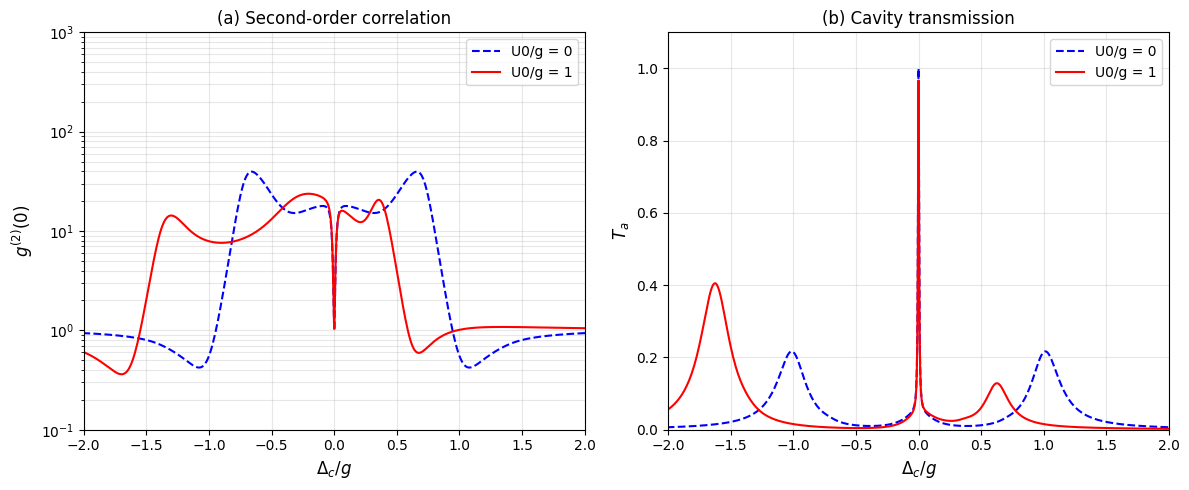

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
x_axis = delta_c_list / g
for i, U0_val in enumerate(STK):
    label = f'U0/g = {U0_val/g:.0f}'
    style = '-' if i==1 else '--' 
    color = 'red' if i==1 else 'blue'
    axes[0].semilogy(x_axis, all_g2_0[i], label=label, linestyle=style, color=color)
    axes[1].plot(x_axis, all_Ta[i], label=label, linestyle=style, color=color)
axes[0].set_xlabel(r'$\Delta_c/g$', fontsize=12)
axes[0].set_ylabel(r'$g^{(2)}(0)$', fontsize=12)
axes[0].set_xlim([-2, 2])
axes[0].set_ylim([1e-1, 1e3]) 
axes[0].legend()
axes[0].set_title('(a) Second-order correlation')
axes[0].grid(True, which="both", alpha=0.3)

axes[1].set_xlabel(r'$\Delta_c/g$', fontsize=12)
axes[1].set_ylabel(r'$T_a$', fontsize=12)
axes[1].set_xlim([-2, 2])
axes[1].set_ylim([0, 1.1])
axes[1].legend()
axes[1].set_title('(b) Cavity transmission')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()